In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import time
import numpy as np
import nn
import data

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from nn import ConvModel
model = ConvModel()
dummy_input = np.ones((1,256, 256,3))

for kernel in model.kernels:
    print(kernel.shape)
model.model_fn(dummy_input, *model.kernels)

initializing ConvNet...
using normalization
(3, 3, 3, 16)
(3, 3, 16, 16)
(3, 3, 16, 16)
(3, 3, 16, 32)
(3, 3, 32, 32)
(3, 3, 32, 32)
(3, 3, 32, 64)
(3, 3, 64, 64)
(3, 3, 64, 64)
(3, 3, 64, 128)
(3, 3, 128, 128)
(3, 3, 128, 128)
(3, 3, 128, 64)
(3, 3, 64, 64)
(3, 3, 64, 64)
(3, 3, 64, 32)
(3, 3, 32, 32)
(3, 3, 32, 32)
(3, 3, 32, 1)


Array([[[[-9.388366  ],
         [-5.6891284 ],
         [-6.7050147 ],
         ...,
         [-6.8547683 ],
         [-9.26379   ],
         [-7.776365  ]],

        [[-7.0634103 ],
         [-9.388366  ],
         [-3.0025005 ],
         ...,
         [-9.388366  ],
         [-7.748218  ],
         [-2.8094041 ]],

        [[-9.388366  ],
         [-6.172803  ],
         [-3.8283374 ],
         ...,
         [-9.388366  ],
         [-5.428666  ],
         [-8.596335  ]],

        ...,

        [[-9.388366  ],
         [-9.388366  ],
         [-9.388366  ],
         ...,
         [ 3.0469844 ],
         [-0.5683617 ],
         [ 3.0209296 ]],

        [[-6.469698  ],
         [-1.4928024 ],
         [-5.7368803 ],
         ...,
         [-7.925685  ],
         [-8.022602  ],
         [-1.2839636 ]],

        [[-6.9977884 ],
         [-7.5467863 ],
         [ 0.18820833],
         ...,
         [-5.1192546 ],
         [-6.8486395 ],
         [ 0.07578475]]]], dtype=float32)

In [4]:
kernel_idx = np.arange(2,len(model.kernels)+2)
kernel_idx

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])

In [6]:
import data
images, masks = data.load_images(16, 32, verbose=True)

loading 16 images...
loading img36.jpg
loading img482.jpg
loading img469.jpg
loading img1088.jpg
loading img455.jpg
loading img333.jpg
loading img327.jpg
loading img441.jpg
loading img1117.jpg
loading img284.jpg
loading img1103.jpg
loading img290.jpg
loading img509.jpg
loading img521.jpg
loading img247.jpg
loading img253.jpg


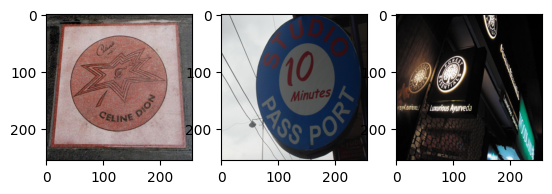

In [7]:
data.show(images[0], images[1], images[2])

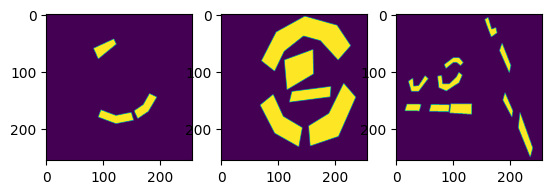

In [8]:
data.show(masks[0], masks[1], masks[2])

(1, 256, 256, 1)


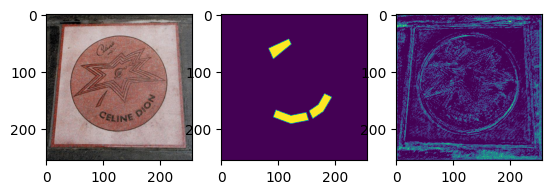

In [9]:
out = model.model_fn(np.expand_dims(images[0], axis=0), *model.kernels)
print(out.shape)
data.show(images[0], masks[0], out.squeeze())

TypeError: Invalid shape (16, 256, 256) for image data

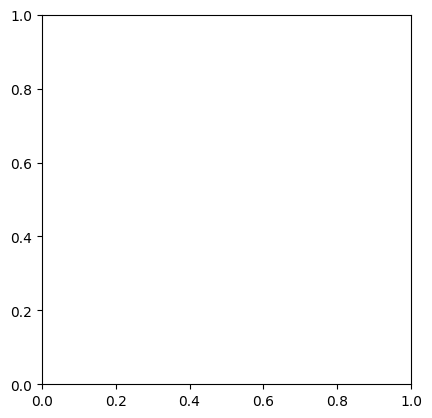

In [10]:
loss_map = nn.binary_crossentropy(masks.squeeze(), out.squeeze())

data.show(loss_map)

In [5]:
def loss_fn(image, mask, *kernels):
    out = model.model_fn(image, *kernels)
    loss = jnp.mean(nn.binary_crossentropy(mask, out))
    return loss

In [ ]:
loss_fn(images, np.expand_dims(masks, axis=-1), *model.kernels)

In [72]:
BATCH_SIZE = 2

In [4]:
model.load_kernels('saved_models/model_1')
model.model_fn(dummy_input, *model.kernels)

Array([[[[17.993975  ],
         [10.320846  ],
         [-0.37908608],
         ...,
         [ 4.994613  ],
         [19.349047  ],
         [ 8.690421  ]],

        [[10.383765  ],
         [11.281044  ],
         [10.060022  ],
         ...,
         [-0.37908608],
         [16.411245  ],
         [-0.37908608]],

        [[ 4.9583225 ],
         [15.527822  ],
         [ 8.43574   ],
         ...,
         [-0.37908608],
         [ 9.406546  ],
         [12.931158  ]],

        ...,

        [[11.923075  ],
         [32.032375  ],
         [13.40242   ],
         ...,
         [ 9.699227  ],
         [-0.37908608],
         [ 1.7195138 ]],

        [[ 3.9675817 ],
         [20.281475  ],
         [-0.37908608],
         ...,
         [11.227863  ],
         [-0.37908608],
         [ 8.364701  ]],

        [[ 6.948722  ],
         [ 8.823435  ],
         [-0.37908608],
         ...,
         [ 1.7997248 ],
         [ 6.2935276 ],
         [-0.37908608]]]], dtype=float32)

In [ ]:
print("Beginning training process...")
old_loss = 0
for epoch in range(10):
    
    
    
    
    
        
    for step in range(len(images) // BATCH_SIZE):
        im_batch = images[step * BATCH_SIZE : (step * BATCH_SIZE) + BATCH_SIZE]
        mk_batch = masks[step * BATCH_SIZE : (step * BATCH_SIZE) + BATCH_SIZE]
        mk_batch =  np.expand_dims(mk_batch, axis=-1)

        loss_grad_fn = jax.grad(loss_fn, argnums = kernel_idx)
        kernel_grad = loss_grad_fn(im_batch, mk_batch, *model.kernels)

        for i in range(len(model.kernels)):
            model.kernels[i] -= kernel_grad[i] * 0.01
        print('.',end='')
    loss = loss_fn(images, np.expand_dims(masks, axis=-1), *model.kernels)
    print(loss)
    
    data.show(images[0], masks[0], model.model_fn(np.expand_dims(images[0], axis=0), *model.kernels))
    
    
        

In [76]:
model.save_kernels('saved_models/model_1')

saving model kernels to saved_models/model_1


In [77]:
model.model_fn(dummy_input, *model.kernels)

Array([[[[17.993975  ],
         [10.320846  ],
         [-0.37908608],
         ...,
         [ 4.994613  ],
         [19.349047  ],
         [ 8.690421  ]],

        [[10.383765  ],
         [11.281044  ],
         [10.060022  ],
         ...,
         [-0.37908608],
         [16.411245  ],
         [-0.37908608]],

        [[ 4.9583225 ],
         [15.527822  ],
         [ 8.43574   ],
         ...,
         [-0.37908608],
         [ 9.406546  ],
         [12.931158  ]],

        ...,

        [[11.923075  ],
         [32.032375  ],
         [13.40242   ],
         ...,
         [ 9.699227  ],
         [-0.37908608],
         [ 1.7195138 ]],

        [[ 3.9675817 ],
         [20.281475  ],
         [-0.37908608],
         ...,
         [11.227863  ],
         [-0.37908608],
         [ 8.364701  ]],

        [[ 6.948722  ],
         [ 8.823435  ],
         [-0.37908608],
         ...,
         [ 1.7997248 ],
         [ 6.2935276 ],
         [-0.37908608]]]], dtype=float32)